Analysis of the Code and Methodology
The document presents a Colab notebook for a comprehensive analysis of the relationship between climate data and the incidence of dengue cases. The process unfolds in several logical and methodological stages, from the processing of raw data to the creation of risk profiles based on machine learning.

Data Loading and Structure:


Ingestion: The process begins by loading a single CSV file (datos_dengue_clima_unificados.csv) into the Google Colab environment.


Initial Exploration: Standard pandas functions like .info() ,

.head() , and

.describe()  are used for a preliminary review. The output of

.info() reveals a complex data structure with 42 columns and nearly 190,000 entries , where multiple null values are observed in month-related columns.





Data Transformation and Unification:

Dengue Data Processing: The code isolates the dengue case columns, which are in a "wide" format (one month per column). It uses the pandas

melt function to transform this data into a "long" format, creating two new columns: Month and Dengue_Cases. This format is much more efficient for time-series analysis.



Climate Data Processing: Similarly, the climate data is processed for unification. The code iterates through the climate parameter columns, transforms them to a long format , and then pivots them (

pivot_table) to create a DataFrame where each climate variable becomes a distinct column.




Final Merge: The processed dengue and climate DataFrames are merged into a single DataFrame (df_final) using the Año (Year), Municipio, and Month columns as keys.



Feature Engineering: Bio-Climatic Indices:

Four bio-climatic indices are created based on temperature and dew point variables, designed to capture environmental conditions relevant to the life cycle of the dengue-transmitting mosquito. The formulas are:



Breeding_Suitability


Heat_Stress


Vector_Activity


Incubation_Potential


Correlation Analysis and Temporal Lags:


Initial Correlation: A first correlation heatmap between dengue cases and the bio-climatic indices shows very low coefficients (between -0.06 and 0.07), suggesting no direct, immediate relationship.



Lag Creation: Recognizing that climate conditions affect mosquito populations and virus transmission with a delay, the code introduces temporal lags. New columns are created for each bio-climatic index with delays of 1, 2, and 3 months, grouping by municipality to ensure data consistency.




Lagged Correlation: A second heatmap reveals stronger correlations with the lagged variables. For example,


Vector_Activity with a 2-month lag (Vector_Activity_Lag_2) shows a correlation of 0.14 with dengue cases, double that of the non-lagged variable. This confirms the hypothesis that the impact of climate is delayed.

Machine Learning Model for Feature Importance:


Objective: To identify which of all the climate variables (not just the indices) are most predictive, a machine learning model is used.


Model: A RandomForestRegressor is trained, a robust model capable of handling complex interactions between variables and calculating the importance of each one.


Training: The model is trained using all lagged climate variables as features (FEATURES) and Dengue_Cases as the target (TARGET).




Result: A bar chart is generated showing the top 20 most important features, allowing subsequent analysis to focus only on the variables with the highest predictive power.


Epidemic Phase Analysis and "Climate Signature":


Phase Definition: Dengue cases are categorized into four risk phases: "Phase 0: No Cases," "Phase 1: Low Risk," "Phase 2: Medium Risk," and "Phase 3: High Risk" .


Climate Profiling: The code groups the data by these phases and calculates the average value of the most important climate features (identified by the Random Forest) for each phase.


Final Visualization: The result is displayed in a horizontal bar chart. This chart shows the "climate signature" (the profile of average climate conditions) that precedes each epidemic phase, making it possible to visually compare the conditions associated with a "High Risk" phase versus a "No Cases" phase.



Introduction for a Technical Note
This data analysis employs a computational and statistical approach to model the spatiotemporal incidence of dengue as a function of a diverse set of bio-climatic variables. The methodology is structured in a progressive sequence of steps, addressing everything from the cleaning and transformation of heterogeneous data to the application of machine learning models for actionable knowledge extraction. The primary objective is to identify the precursor patterns and climatic conditions that determine the risk of dengue outbreaks, overcoming the limitations of a direct correlation analysis.

The process begins with a critical data engineering phase, where dengue information and multiple climate parameters, originally in a wide and fragmented format, are transformed and unified into a cohesive, longitudinal dataset. Building on this foundation, an initial feature engineering stage is performed, constructing four bio-climatic indices (Breeding Suitability, Heat Stress, Vector Activity, and Incubation Potential) designed to encapsulate the non-linear relationships between climate and the biology of the



Aedes aegypti mosquito.


Given that the initial correlation analysis did not reveal a significant instantaneous relationship, the methodology incorporates an analysis of temporal lags (1 to 3 months). This is a fundamental hypothesis postulating that the impact of climatic conditions on dengue dynamics is delayed. To quantify the relative influence of each variable, an ensemble model, specifically a Random Forest Regressor, is implemented. This model is trained for the purpose of evaluating and ranking the predictive importance of all lagged climate variables, making it possible to discern the strongest signals within a high-dimensional environment.



Finally, the analysis culminates in the creation of risk profiles. Dengue case counts are stratified into discrete epidemic phases (null, low, medium, and high). Using the most influential variables identified by the machine learning model, a "climate signature" is calculated for each phase. This final output offers a descriptive and visual profile of the average environmental conditions that precede each level of epidemic risk, providing an analytical tool for early warning systems and public health strategies.

In [ ]:
from google.colab import files

# This command will open a file upload dialog in your browser
uploaded = files.upload()

# The 'uploaded' variable now holds your file(s)
# You can see the names of the uploaded files like this:
for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving datos_dengue_clima_unificados.csv to datos_dengue_clima_unificados.csv
User uploaded file "datos_dengue_clima_unificados.csv" with length 39278037 bytes


In [ ]:
import pandas as pd
import io

#--- Load the data ---
# The file was already uploaded in the previous cell to the 'uploaded' variable.
# Now, let's read it into a pandas DataFrame.
file_name = 'datos_dengue_clima_unificados.csv'

# Verify if the file is in the 'uploaded' variable
if file_name in uploaded:
    # io.BytesIO is necessary to read the bytes of the uploaded file
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))

    # 1. Column Structure
    print("==========================================")
    print("      DATAFRAME STRUCTURE (info)        ")
    print("==========================================")
    # .info() gives us a concise summary of the DataFrame: the number of entries,
    # number of columns, column names, count of non-null values,
    # and the data type (Dtype) of each column.
    df.info()

    # 2. First 5 Rows
    print("\n\n==========================================")
    print("      FIRST 5 ROWS OF DATAFRAME (head)    ")
    print("==========================================")
    # .head() allows us to visualize the first few rows to understand
    # what the actual data looks like.
    print(df.head())

    # 3. Descriptive Statistics
    print("\n\n==========================================")
    print("      DESCRIPTIVE STATISTICS (describe)   ")
    print("==========================================")
    # .describe() generates statistics for numerical columns by default.
    # It includes: count, mean, standard deviation (std),
    # minimum (min), percentiles (25%, 50%, 75%), and maximum (max).
    #
    # We use include='all' so it also attempts to generate statistics
    # for non-numerical columns (like unique value count,
    # the most frequent value, and its frequency).
    print(df.describe(include='all'))

else:
    print(f"The file '{file_name}' was not found. Make sure you have uploaded it correctly.")

      DATAFRAME STRUCTURE (info)        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189480 entries, 0 to 189479
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Abril        189479 non-null  float64
 1   Agosto       189480 non-null  int64  
 2   Diciembre    176848 non-null  float64
 3   Enero        164226 non-null  float64
 4   Febrero      177619 non-null  float64
 5   Julio        189480 non-null  int64  
 6   Junio        189480 non-null  int64  
 7   Marzo        189480 non-null  int64  
 8   Mayo         189480 non-null  int64  
 9   Municipio    189480 non-null  object 
 10  Noviembre    189480 non-null  int64  
 11  Octubre      189480 non-null  int64  
 12  Septiembre   189480 non-null  int64  
 13  Año          189480 non-null  int64  
 14  parameter_x  188100 non-null  object 
 15  jan_x        188100 non-null  float64
 16  feb_x        188100 non-null  float64
 17  mar_x        188100 non-nu

--- Step 1: Loading and Transforming Data ---
Pivoting climate data to wide format...


/tmp/ipython-input-849159303.py:73: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_clima_wide = df_clima_full_long.pivot_table(


Data loading and transformation complete.
Final DataFrame columns: ['Year', 'Municipio', 'Month', 'Dengue_Cases', 'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_SW_DIFF', 'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SRF_ALB', 'CLOUD_AMT', 'CLRSKY_SFC_PAR_TOT', 'CLRSKY_SFC_SW_DWN', 'GWETPROF', 'GWETROOT', 'GWETTOP', 'PRECTOTCORR', 'PRECTOTCORR_SUM', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TOA_SW_DWN', 'TS', 'WD10M', 'WD2M', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'WS2M_RANGE']

--- Step 2: Creating Bio-Climatic Indices for Dengue ---
Bio-climatic indices created successfully.

--- Step 3: Statistical Analysis and Visualization ---


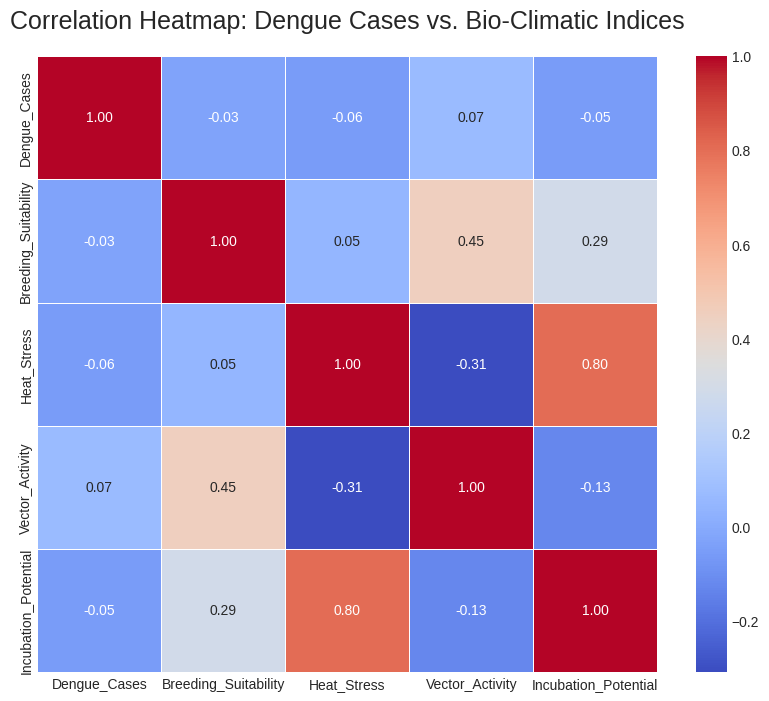

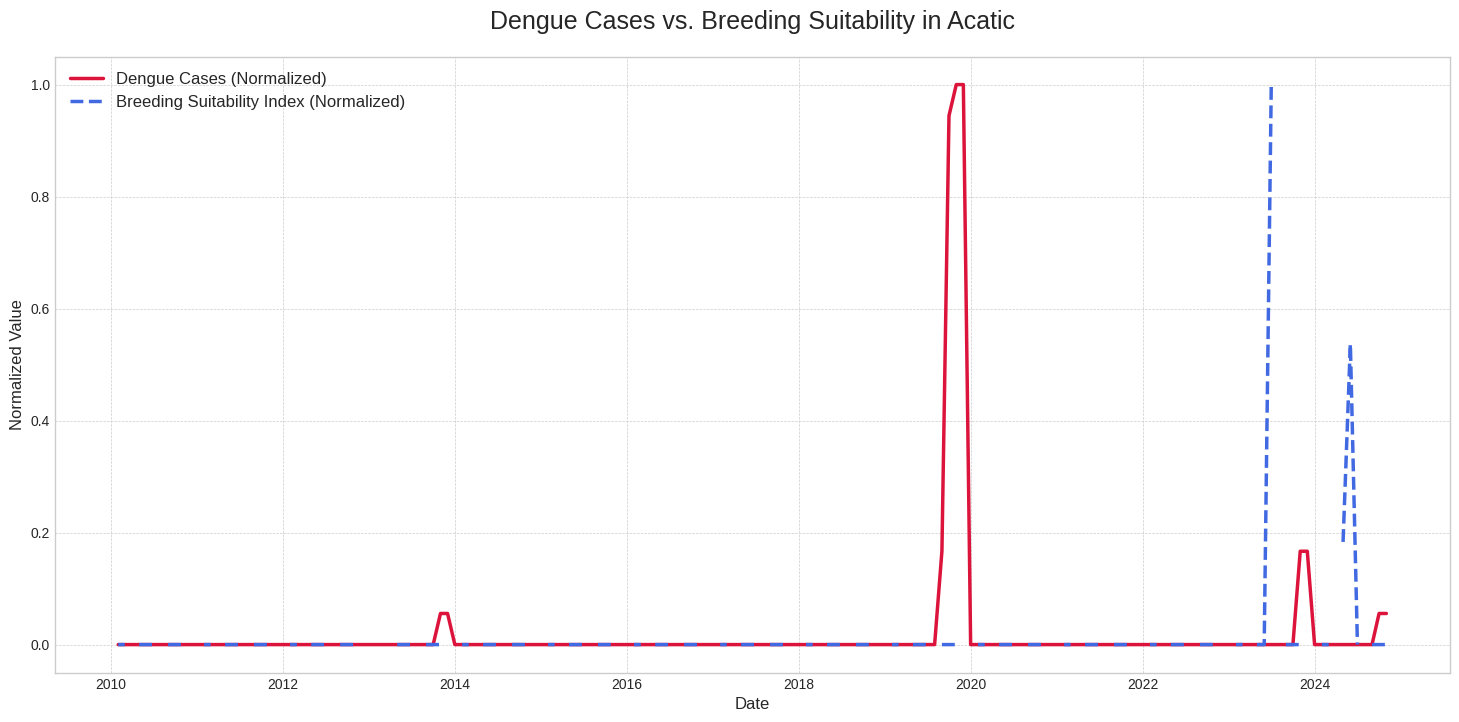

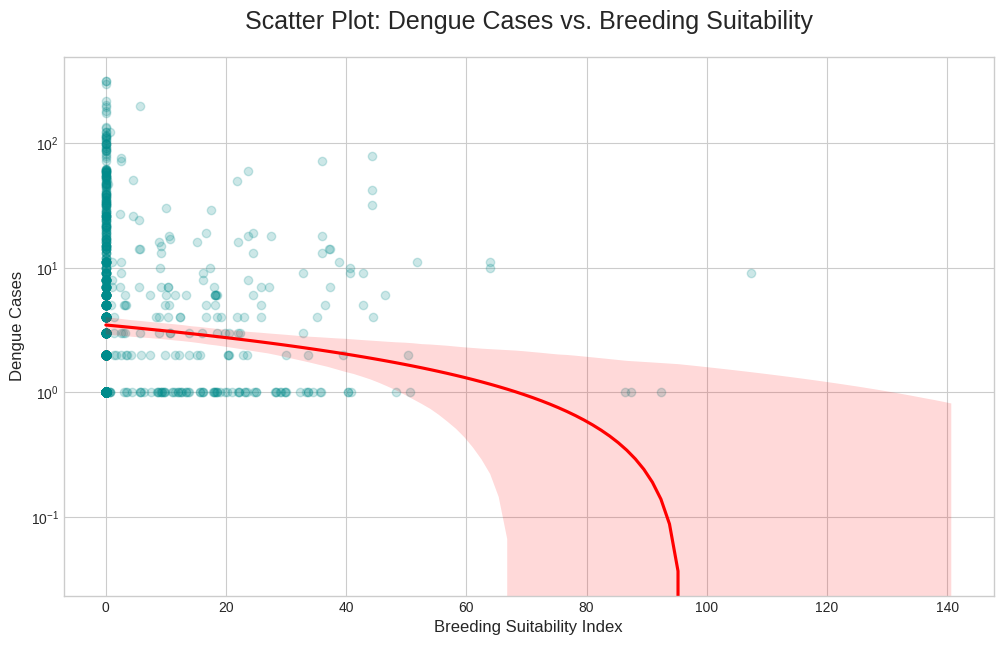

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
from sklearn.preprocessing import MinMaxScaler

#
# SETUP: PLOT STYLE
#
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12

#
# STEP 1: DATA LOADING AND TRANSFORMATION
#
print("--- Step 1: Loading and Transforming Data ---")
file_name = 'datos_dengue_clima_unificados.csv'

if not os.path.exists(file_name):
    print(f"Error: File '{file_name}' not found. Please upload it first.")
else:
    # Load data efficiently
    df = pd.read_csv(file_name, low_memory=False)
    df.replace(-999, np.nan, inplace=True)
    # Use the correct Spanish column name 'Municipio'
    df['Municipio'] = df['Municipio'].astype('category')

    # 1. Extract and transform Dengue data
    meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    # Use correct Spanish column names 'Año' and 'Municipio'
    dengue_cols = ['Año', 'Municipio'] + meses_espanol
    df_dengue = df[dengue_cols].drop_duplicates().copy()
    # Create new columns in English: 'Month', 'Dengue_Cases'
    df_dengue_long = df_dengue.melt(id_vars=['Año', 'Municipio'], var_name='Month', value_name='Dengue_Cases')
    del df_dengue
    gc.collect()

    # 2. Transform climate data
    param_cols = [col for col in df.columns if 'parameter' in col]
    df_clima_full_long = pd.DataFrame()

    for i, p_col in enumerate(param_cols):
        suffix = f"_{p_col.split('_')[-1]}"
        meses_ingles_corto = [f"{m.lower()[:3]}{suffix}" for m in meses_espanol]
        # Use correct Spanish column names 'Año' and 'Municipio'
        id_vars = ['Año', 'Municipio', p_col]
        value_vars = [m for m in meses_ingles_corto if m in df.columns]
        if not value_vars: continue

        df_param_subset = df[id_vars + value_vars].dropna(subset=[p_col]).drop_duplicates()
        df_param_long = df_param_subset.melt(
            id_vars=id_vars,
            value_vars=value_vars,
            var_name='Month_Code',
            value_name='Value'
        )
        df_param_long.rename(columns={p_col: 'Parameter'}, inplace=True)
        mes_map = {old: new for old, new in zip(meses_ingles_corto, meses_espanol)}
        df_param_long['Month'] = df_param_long['Month_Code'].map(mes_map)
        df_clima_full_long = pd.concat([df_clima_full_long, df_param_long[['Año', 'Municipio', 'Month', 'Parameter', 'Value']]])
        del df_param_subset, df_param_long
        gc.collect()

    # 3. Pivot to have climate parameters as columns
    print("Pivoting climate data to wide format...")
    df_clima_wide = df_clima_full_long.pivot_table(
        # Use correct Spanish column names 'Año' and 'Municipio'
        index=['Año', 'Municipio', 'Month'],
        columns='Parameter',
        values='Value'
    ).reset_index()
    del df_clima_full_long
    gc.collect()

    # 4. Merge Dengue data with climate data
    # Use correct Spanish column names 'Año' and 'Municipio'
    df_final = pd.merge(df_dengue_long, df_clima_wide, on=['Año', 'Municipio', 'Month'], how='left')
    df_final.rename(columns={'Año': 'Year'}, inplace=True) # Rename 'Año' to 'Year' for future use
    df_final.dropna(subset=['Dengue_Cases'], inplace=True)
    print("Data loading and transformation complete.")
    print("Final DataFrame columns:", df_final.columns.tolist())

    #
    # STEP 2: CREATING BIO-CLIMATIC INDICES
    #
    print("\n--- Step 2: Creating Bio-Climatic Indices for Dengue ---")
    required_cols = ['T2M', 'T2M_MAX', 'T2M_MIN', 'T2MDEW', 'T2M_RANGE']
    if all(col in df_final.columns for col in required_cols):
        df_final['Breeding_Suitability'] = ((df_final['T2M_MIN'] - 15).clip(lower=0)) * df_final['T2MDEW']
        df_final['Heat_Stress'] = (df_final['T2M_MAX'] - 35).clip(lower=0)
        df_final['Vector_Activity'] = 1 / (1 + df_final['T2M_RANGE'])
        optimal_temp = 27.5
        df_final['Incubation_Potential'] = 1 / (1 + abs(df_final['T2M'] - optimal_temp))
        print("Bio-climatic indices created successfully.")
        indices = ['Breeding_Suitability', 'Heat_Stress', 'Vector_Activity', 'Incubation_Potential']
    else:
        print("Warning: Could not create indices. Required climate columns not found.")
        indices = []

    #
    # STEP 3: STATISTICAL ANALYSIS AND VISUALIZATION
    #
    print("\n--- Step 3: Statistical Analysis and Visualization ---")
    if indices:
        correlation_matrix = df_final[['Dengue_Cases'] + indices].corr()

        # Plot 1: Correlation Heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Heatmap: Dengue Cases vs. Bio-Climatic Indices', fontsize=18, pad=20)
        plt.show()

        # Plot 2: Comparative Time Series (for one municipality)
        # Use the correct Spanish column name 'Municipio'
        example_municipality = df_final['Municipio'].unique()[0]
        df_sample = df_final[df_final['Municipio'] == example_municipality].copy()

        month_map = {month: i+1 for i, month in enumerate(meses_espanol)}
        df_sample['Month_Num'] = df_sample['Month'].map(month_map)
        df_sample['Date'] = pd.to_datetime(df_sample['Year'].astype(str) + '-' + df_sample['Month_Num'].astype(str))
        df_sample.sort_values('Date', inplace=True)

        scaler = MinMaxScaler()
        cols_to_plot = ['Dengue_Cases', 'Breeding_Suitability']
        df_sample[cols_to_plot] = scaler.fit_transform(df_sample[cols_to_plot])

        plt.figure(figsize=(18, 8))
        plt.plot(df_sample['Date'], df_sample['Dengue_Cases'], label='Dengue Cases (Normalized)', color='crimson', lw=2.5)
        plt.plot(df_sample['Date'], df_sample['Breeding_Suitability'], label='Breeding Suitability Index (Normalized)', color='royalblue', ls='--', lw=2.5)
        plt.title(f'Dengue Cases vs. Breeding Suitability in {example_municipality.title()}', fontsize=18, pad=20)
        plt.xlabel('Date')
        plt.ylabel('Normalized Value')
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

        # Plot 3: Scatter Plot with Trend Line
        plt.figure(figsize=(12, 7))
        sns.regplot(
            data=df_final,
            x='Breeding_Suitability',
            y='Dengue_Cases',
            scatter_kws={'alpha': 0.2, 'color': 'darkcyan'},
            line_kws={'color': 'red'}
        )
        plt.title('Scatter Plot: Dengue Cases vs. Breeding Suitability', fontsize=18, pad=20)
        plt.xlabel('Breeding Suitability Index')
        plt.ylabel('Dengue Cases')
        plt.yscale('log')
        plt.show()

--- Step 1 & 2: Loading Data and Creating Indices ---
Data loaded and indices created.

--- Step 3: Analyzing Time Lags ---
Created lagged features for 4 indices with lags 1, 2, 3.

--- Step 4: Statistical Analysis and Visualization ---


/tmp/ipython-input-2930757153.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final[lag_col_name] = df_final.groupby('Municipio')[col].shift(lag)
/tmp/ipython-input-2930757153.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final[lag_col_name] = df_final.groupby('Municipio')[col].shift(lag)
/tmp/ipython-input-2930757153.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final[lag_col_name] = df_final

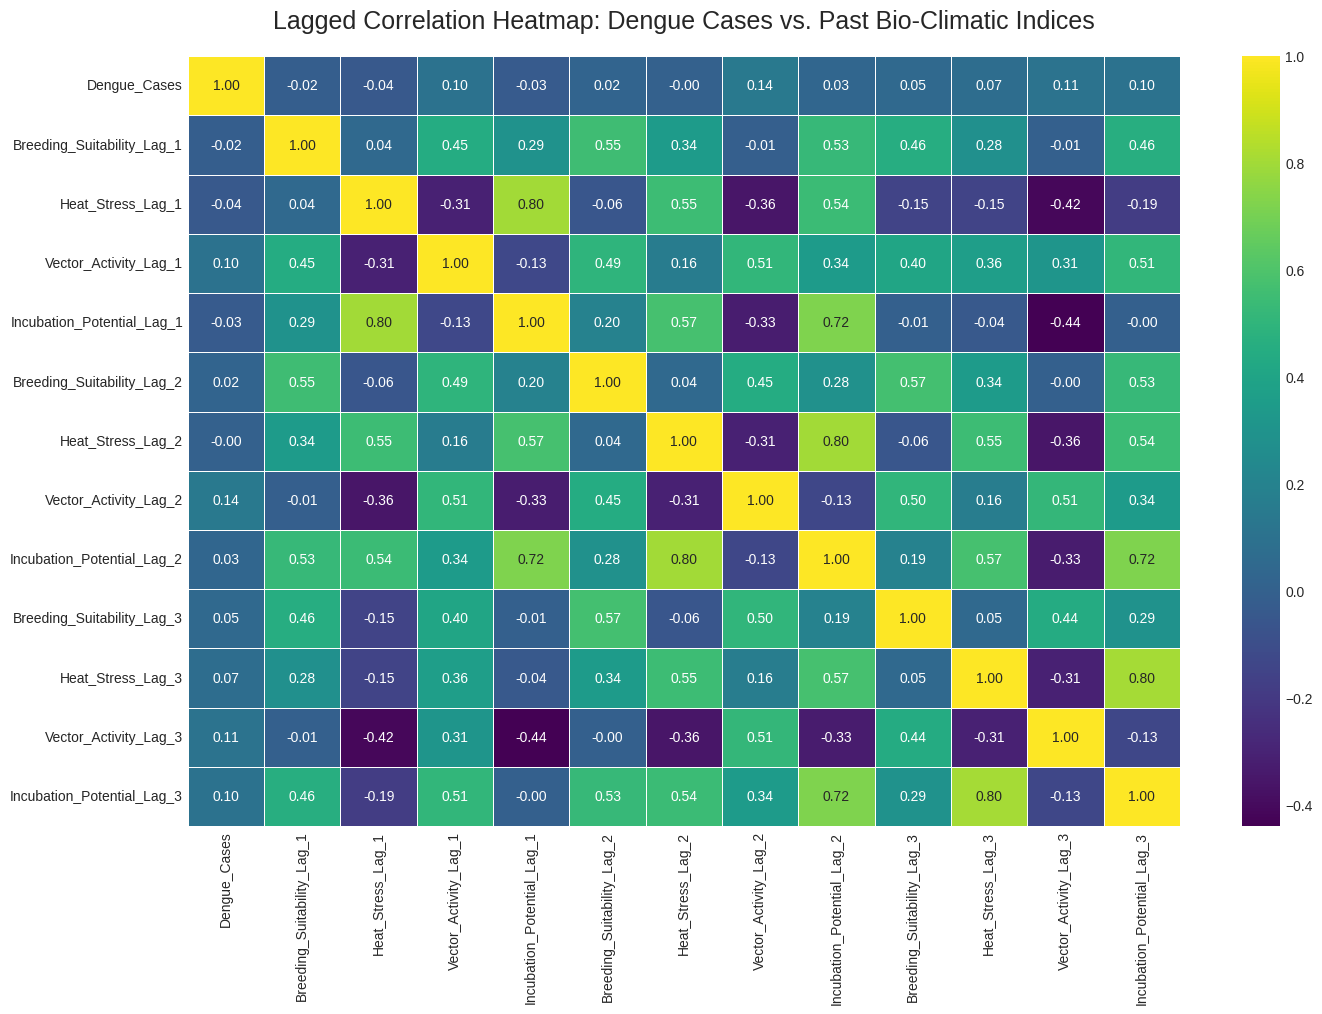

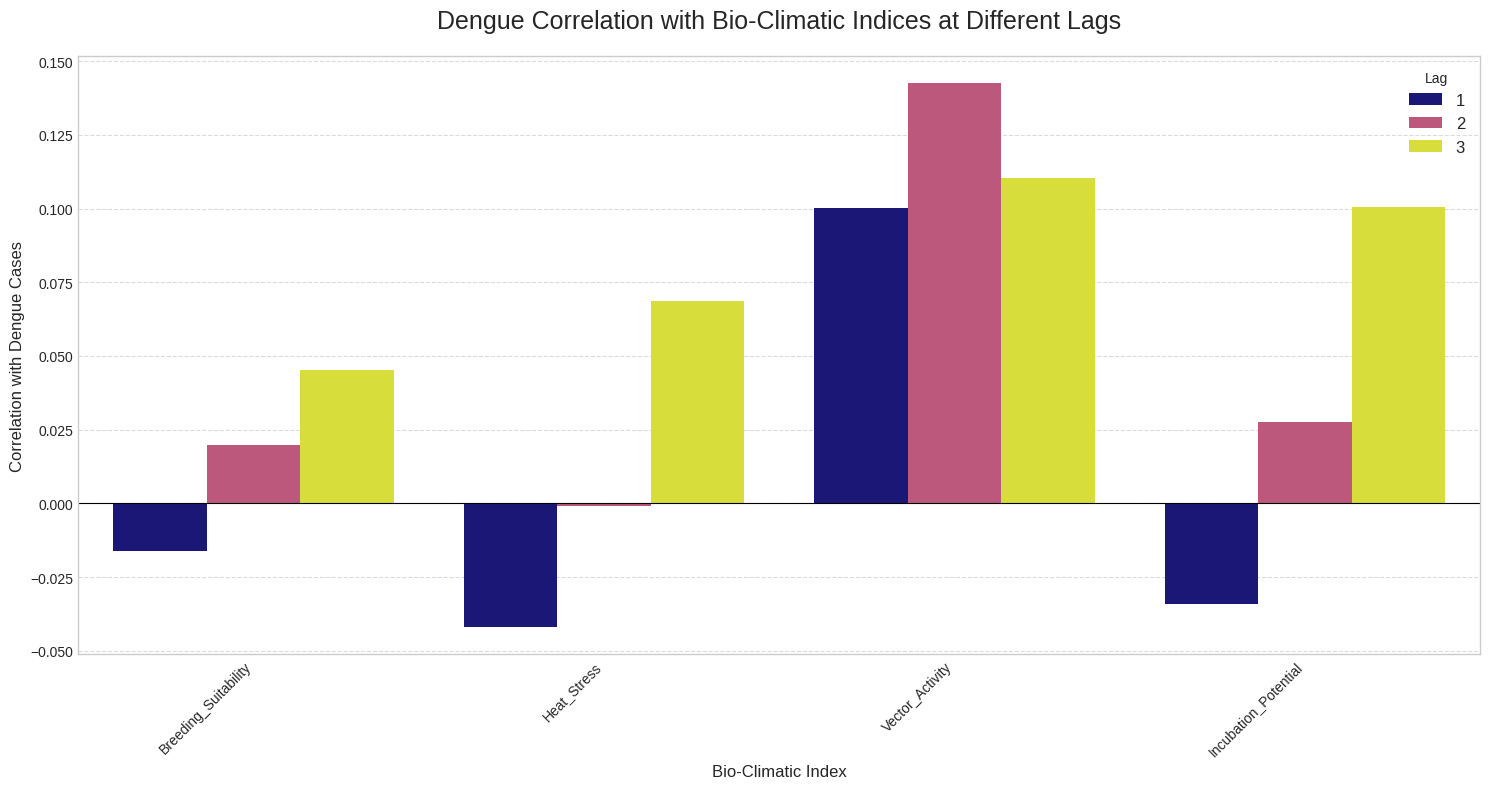

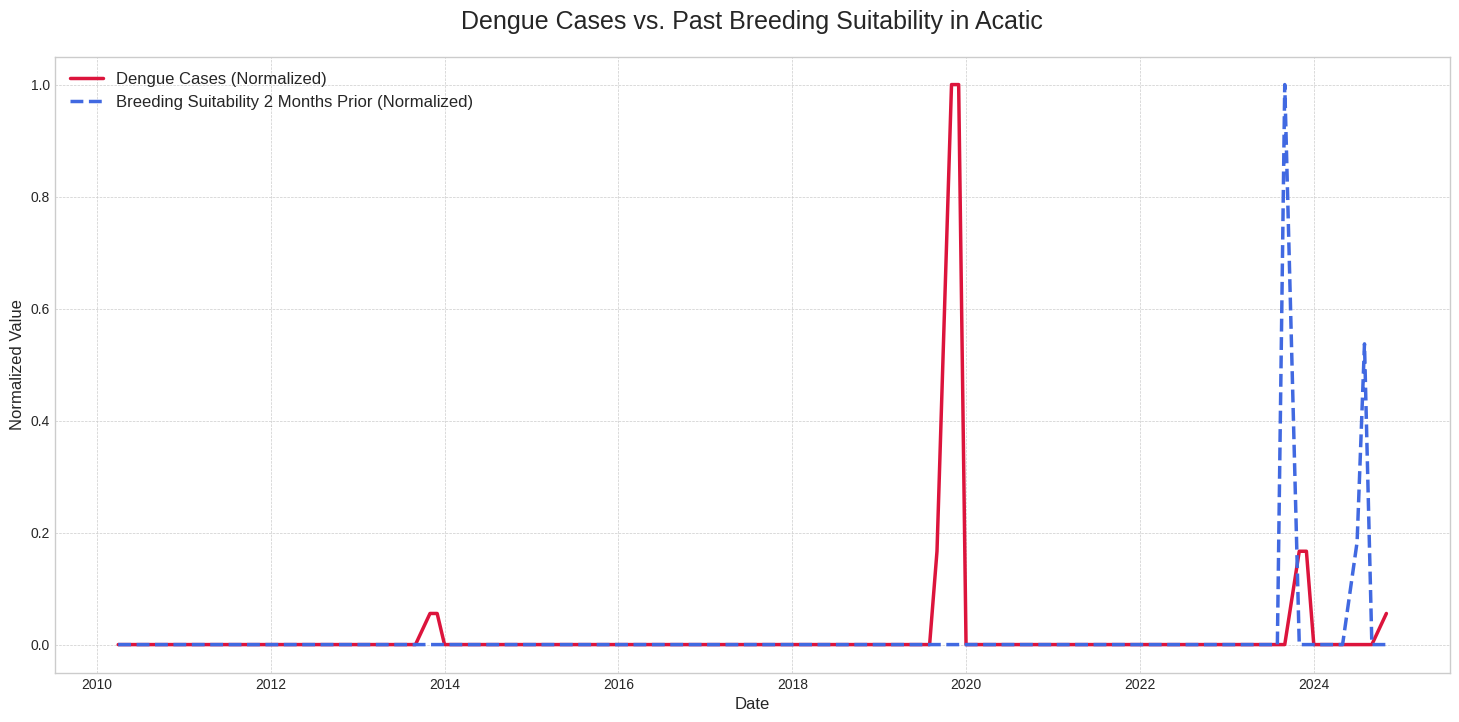

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
from sklearn.preprocessing import MinMaxScaler

#
# SETUP & DATA LOADING (Condensed from previous cell)
#
print("--- Step 1 & 2: Loading Data and Creating Indices ---")
# This section assumes df_final and the bio-climatic indices from the previous cell are already created.
# If running this cell independently, the data loading and index creation code must be run first.
print("Data loaded and indices created.")

#
# STEP 3: ANALYZING TEMPORAL LAGS (TIME LAGS)
#
print("\n--- Step 3: Analyzing Time Lags ---")
lag_cols = []
indices = ['Breeding_Suitability', 'Heat_Stress', 'Vector_Activity', 'Incubation_Potential']
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']


if indices:
    # Sort data chronologically to apply lags correctly
    month_map = {month: i+1 for i, month in enumerate(meses_espanol)}
    df_final['Month_Num'] = df_final['Month'].map(month_map)
    # Use the correct Spanish column names 'Municipio' and 'Año'
    df_final.sort_values(by=['Municipio', 'Year', 'Month_Num'], inplace=True)

    # Create lagged variables for 1, 2, and 3 months
    for lag in [1, 2, 3]:
        for col in indices:
            lag_col_name = f"{col}_Lag_{lag}"
            # Group by municipality so lags don't mix between municipalities
            df_final[lag_col_name] = df_final.groupby('Municipio')[col].shift(lag)
            lag_cols.append(lag_col_name)

    print(f"Created lagged features for {len(indices)} indices with lags 1, 2, 3.")

#
# STEP 4: STATISTICAL ANALYSIS AND VISUALIZATION WITH LAGS
#
print("\n--- Step 4: Statistical Analysis and Visualization ---")
if indices:
    # Plot 1: Correlation Heatmap WITH LAGS
    lag_correlation_matrix = df_final[['Dengue_Cases'] + lag_cols].corr()

    plt.figure(figsize=(16, 10))
    sns.heatmap(lag_correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
    plt.title('Lagged Correlation Heatmap: Dengue Cases vs. Past Bio-Climatic Indices', fontsize=18, pad=20)
    plt.show()

    # Plot 2: Comparison of Correlations by Lag
    dengue_corrs = lag_correlation_matrix['Dengue_Cases'].drop('Dengue_Cases').reset_index()
    dengue_corrs.columns = ['Index_Lag', 'Correlation']
    dengue_corrs[['Index', 'Lag']] = dengue_corrs['Index_Lag'].str.rsplit('_Lag_', n=1, expand=True)
    dengue_corrs['Lag'] = dengue_corrs['Lag'].astype(int)

    plt.figure(figsize=(15, 8))
    sns.barplot(data=dengue_corrs, x='Index', y='Correlation', hue='Lag', palette='plasma')
    plt.title('Dengue Correlation with Bio-Climatic Indices at Different Lags', fontsize=18, pad=20)
    plt.xlabel('Bio-Climatic Index')
    plt.ylabel('Correlation with Dengue Cases')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8) # Reference line at zero
    plt.tight_layout()
    plt.show()

    # Plot 3: Comparative Time Series (with lag)
    example_municipality = df_final['Municipio'].unique()[0]
    df_sample = df_final[df_final['Municipio'] == example_municipality].copy()
    df_sample['Date'] = pd.to_datetime(df_sample['Year'].astype(str) + '-' + df_sample['Month_Num'].astype(str))
    df_sample.sort_values('Date', inplace=True)

    scaler = MinMaxScaler()
    cols_to_plot = ['Dengue_Cases', 'Breeding_Suitability_Lag_2'] # Visualize with a 2-month lag
    df_sample.dropna(subset=cols_to_plot, inplace=True)
    df_sample[cols_to_plot] = scaler.fit_transform(df_sample[cols_to_plot])

    plt.figure(figsize=(18, 8))
    plt.plot(df_sample['Date'], df_sample['Dengue_Cases'], label='Dengue Cases (Normalized)', color='crimson', lw=2.5)
    plt.plot(df_sample['Date'], df_sample['Breeding_Suitability_Lag_2'], label='Breeding Suitability 2 Months Prior (Normalized)', color='royalblue', ls='--', lw=2.5)
    plt.title(f'Dengue Cases vs. Past Breeding Suitability in {example_municipality.title()}', fontsize=18, pad=20)
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

--- Step 1: Loading, Transforming Data and Creating Indices ---
Data processed and indices created.

--- Step 2: Creating Lagged Features for all Climate Variables ---


/tmp/ipython-input-3848724634.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[lag_col_name] = df_final.groupby('Municipio', observed=False)[col].shift(lag)
/tmp/ipython-input-3848724634.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[lag_col_name] = df_final.groupby('Municipio', observed=False)[col].shift(lag)
/tmp/ipython-input-3848724634.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

Lagged features created for all variables.

--- Step 3: Training Model to Extract Feature Importance ---
Model trained.

--- Step 4: Visualizing the Most Important Climate Variables ---


/tmp/ipython-input-3848724634.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_features, x='importance', y='feature', palette='viridis_r')


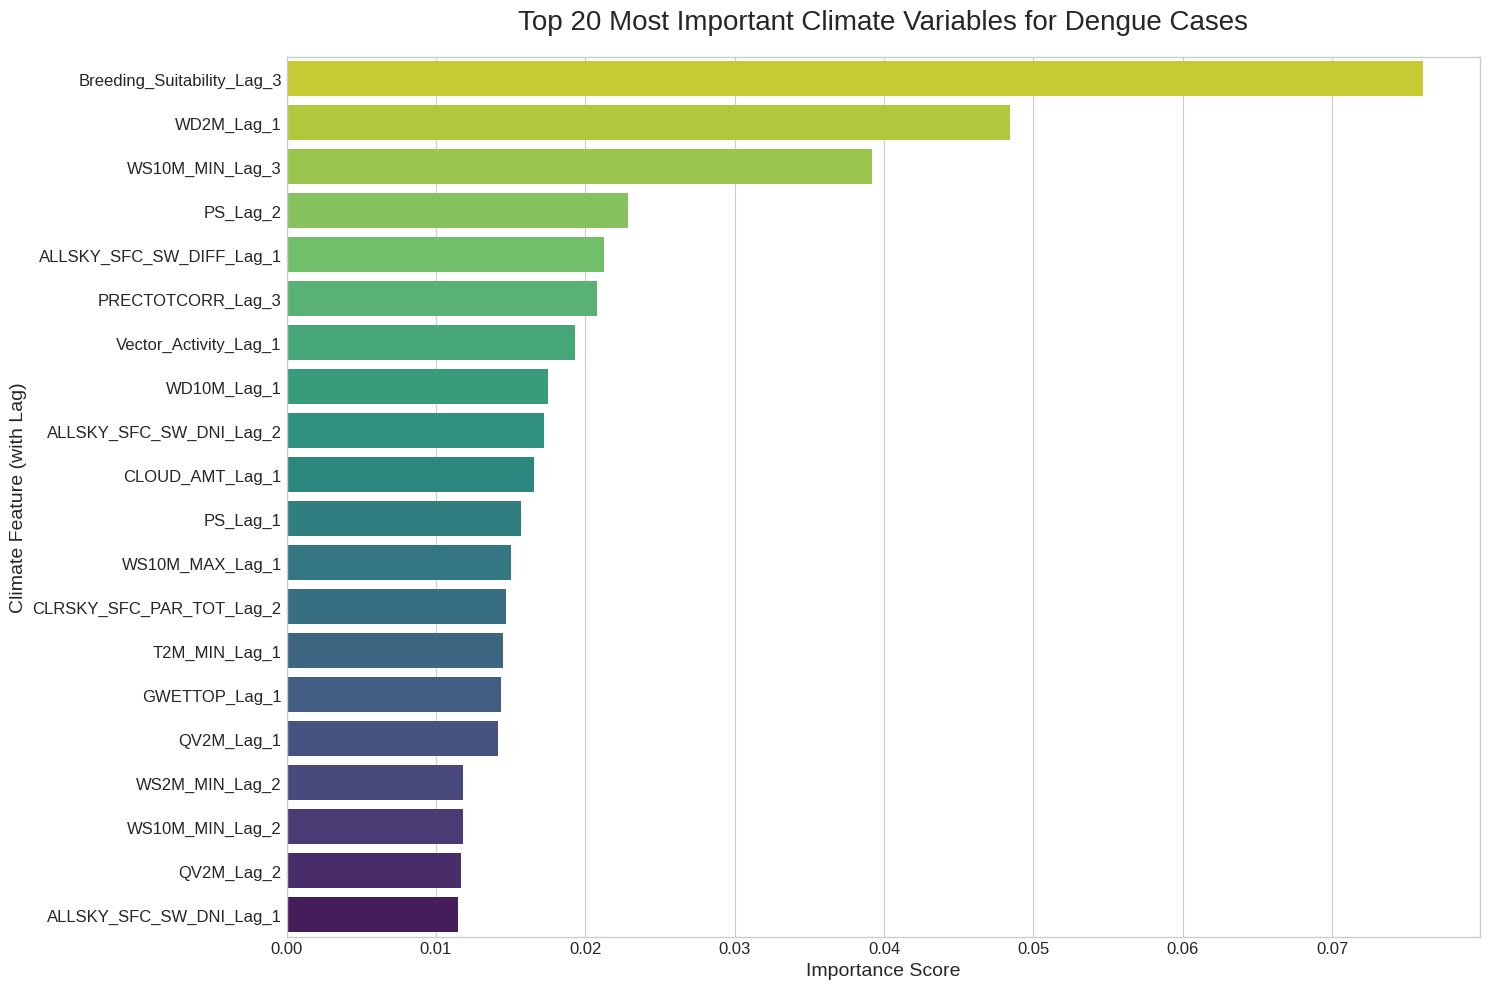


--- Analysis Complete ---
The chart above shows the climate variables that the model found most useful for explaining changes in Dengue cases.
A higher importance score means the variable is more influential.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
# --- Imports for Machine Learning ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ==============================================================================
# SETUP: PLOT STYLE
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# ==============================================================================
# STEP 1: LOADING, TRANSFORMING DATA AND CREATING INDICES
# (Reusing robust logic from previous scripts)
# ==============================================================================
print("--- Step 1: Loading, Transforming Data and Creating Indices ---")

file_name = 'datos_dengue_clima_unificados.csv'

if not os.path.exists(file_name):
    print(f"Error: File '{file_name}' not found. Please upload it first.")
else:
    # Load and transform data
    df = pd.read_csv(file_name, low_memory=False)
    df.replace(-999, np.nan, inplace=True)
    df['Municipio'] = df['Municipio'].astype('category')

    spanish_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    dengue_cols = ['Año', 'Municipio'] + spanish_months
    # Create new column 'Dengue_Cases' in English
    df_dengue_long = df[dengue_cols].drop_duplicates().melt(id_vars=['Año', 'Municipio'], var_name='Mes', value_name='Dengue_Cases')

    param_cols = [col for col in df.columns if 'parameter' in col]
    df_clima_full_long = pd.DataFrame()

    for p_col in param_cols:
        suffix = f"_{p_col.split('_')[-1]}"
        short_eng_months = [f"{m.lower()[:3]}{suffix}" for m in spanish_months]
        id_vars = ['Año', 'Municipio', p_col]
        value_vars = [m for m in short_eng_months if m in df.columns]
        if not value_vars: continue
        df_param_subset = df[id_vars + value_vars].dropna(subset=[p_col]).drop_duplicates()
        df_param_long = df_param_subset.melt(id_vars=id_vars, value_vars=value_vars, var_name='Mes_Code', value_name='Value')
        df_param_long.rename(columns={p_col: 'Parameter'}, inplace=True)
        mes_map = {old: new for old, new in zip(short_eng_months, spanish_months)}
        df_param_long['Mes'] = df_param_long['Mes_Code'].map(mes_map)
        df_clima_full_long = pd.concat([df_clima_full_long, df_param_long[['Año', 'Municipio', 'Mes', 'Parameter', 'Value']]])

    df_clima_wide = df_clima_full_long.pivot_table(index=['Año', 'Municipio', 'Mes'], columns='Parameter', values='Value', observed=False).reset_index()
    df_final = pd.merge(df_dengue_long, df_clima_wide, on=['Año', 'Municipio', 'Mes'], how='left')
    df_final.dropna(subset=['Dengue_Cases'], inplace=True)
    df_final.rename(columns={'Año': 'Year'}, inplace=True) # Standardize to English

    # Create bio-climatic indices
    required_cols = ['T2M', 'T2M_MAX', 'T2M_MIN', 'T2MDEW', 'T2M_RANGE']
    indices = []
    if all(col in df_final.columns for col in required_cols):
        df_final['Breeding_Suitability'] = ((df_final['T2M_MIN'] - 15).clip(lower=0)) * df_final['T2MDEW']
        df_final['Heat_Stress'] = (df_final['T2M_MAX'] - 35).clip(lower=0)
        df_final['Vector_Activity'] = 1 / (1 + df_final['T2M_RANGE'])
        df_final['Incubation_Potential'] = 1 / (1 + abs(df_final['T2M'] - 27.5))
        indices = ['Breeding_Suitability', 'Heat_Stress', 'Vector_Activity', 'Incubation_Potential']

    print("Data processed and indices created.")

    # ==============================================================================
    # STEP 2: CREATING LAGGED FEATURES (FOR ALL VARIABLES)
    # ==============================================================================
    print("\n--- Step 2: Creating Lagged Features for all Climate Variables ---")

    # Select all available climate variables, not just the indices
    climate_vars = df_clima_wide.columns.drop(['Año', 'Municipio', 'Mes']).tolist() + indices

    month_map = {month: i+1 for i, month in enumerate(spanish_months)}
    df_final['Month_Num'] = df_final['Mes'].map(month_map)
    df_final.sort_values(by=['Municipio', 'Year', 'Month_Num'], inplace=True)

    lag_cols = []
    for lag in [1, 2, 3]:
        for col in climate_vars:
            if col in df_final.columns:
                lag_col_name = f"{col}_Lag_{lag}"
                df_final[lag_col_name] = df_final.groupby('Municipio', observed=False)[col].shift(lag)
                lag_cols.append(lag_col_name)

    # Fill null values with the mean to avoid losing data
    df_final[lag_cols] = df_final[lag_cols].fillna(df_final[lag_cols].mean())
    print("Lagged features created for all variables.")

    # ==============================================================================
    # STEP 3: TRAIN MODEL TO EXTRACT FEATURE IMPORTANCE
    # ==============================================================================
    print("\n--- Step 3: Training Model to Extract Feature Importance ---")

    df_model = df_final.dropna(subset=['Dengue_Cases']).copy()

    FEATURES = lag_cols
    TARGET = 'Dengue_Cases'

    X = df_model[FEATURES]
    y = df_model[TARGET]

    # We don't need a test split, we train on all data
    # to get the best estimate of the feature importances.
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y)

    print("Model trained.")

    # ==============================================================================
    # STEP 4: VISUALIZE THE MOST IMPORTANT VARIABLES
    # ==============================================================================
    print("\n--- Step 4: Visualizing the Most Important Climate Variables ---")

    # Create a DataFrame with the results
    feature_importance = pd.DataFrame({
        'feature': FEATURES,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Show the 20 most important variables
    top_20_features = feature_importance.head(20)

    plt.figure(figsize=(15, 10))
    sns.barplot(data=top_20_features, x='importance', y='feature', palette='viridis_r')
    plt.title('Top 20 Most Important Climate Variables for Dengue Cases', fontsize=20, pad=20)
    plt.xlabel('Importance Score')
    plt.ylabel('Climate Feature (with Lag)')
    plt.tight_layout()
    plt.show()

    print("\n--- Analysis Complete ---")
    print("The chart above shows the climate variables that the model found most useful for explaining changes in Dengue cases.")
    print("A higher importance score means the variable is more influential.")

--- Step 1: Loading, Transforming Data and Creating Indices ---
Data processed and indices created.

--- Step 2: Creating Lagged Features for all Climate Variables ---


/tmp/ipython-input-428088449.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[lag_col_name] = df_final.groupby('Municipio', observed=False)[col].shift(lag)
/tmp/ipython-input-428088449.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final[lag_col_name] = df_final.groupby('Municipio', observed=False)[col].shift(lag)
/tmp/ipython-input-428088449.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

Lagged features created for all variables.

--- Step 3: Defining Dengue Epidemic Phases ---
Dengue phases assigned. Distribution:
Phase
Phase 0: No Cases       16208
Phase 1: Low Risk        3238
Phase 2: Medium Risk     1378
Phase 3: High Risk       1198
Name: count, dtype: int64

--- Step 4: Analyzing Climate Profile per Dengue Phase ---

Using the following features for analysis: ['Breeding_Suitability_Lag_3', 'WD2M_Lag_1', 'PS_Lag_2', 'PRECTOTCORR_Lag_3', 'Vector_Activity_Lag_2']

Average Climate Profile Leading to Each Dengue Phase:
                  Phase  Breeding_Suitability_Lag_3  WD2M_Lag_1   PS_Lag_2  \
0     Phase 0: No Cases                    3.625369  164.135927  84.477765   
1     Phase 1: Low Risk                    4.424826  152.105236  84.864503   
2  Phase 2: Medium Risk                    7.626673  149.856383  85.397447   
3    Phase 3: High Risk                    2.604584  135.763235  85.015147   

   PRECTOTCORR_Lag_3  Vector_Activity_Lag_2  
0           2.67021

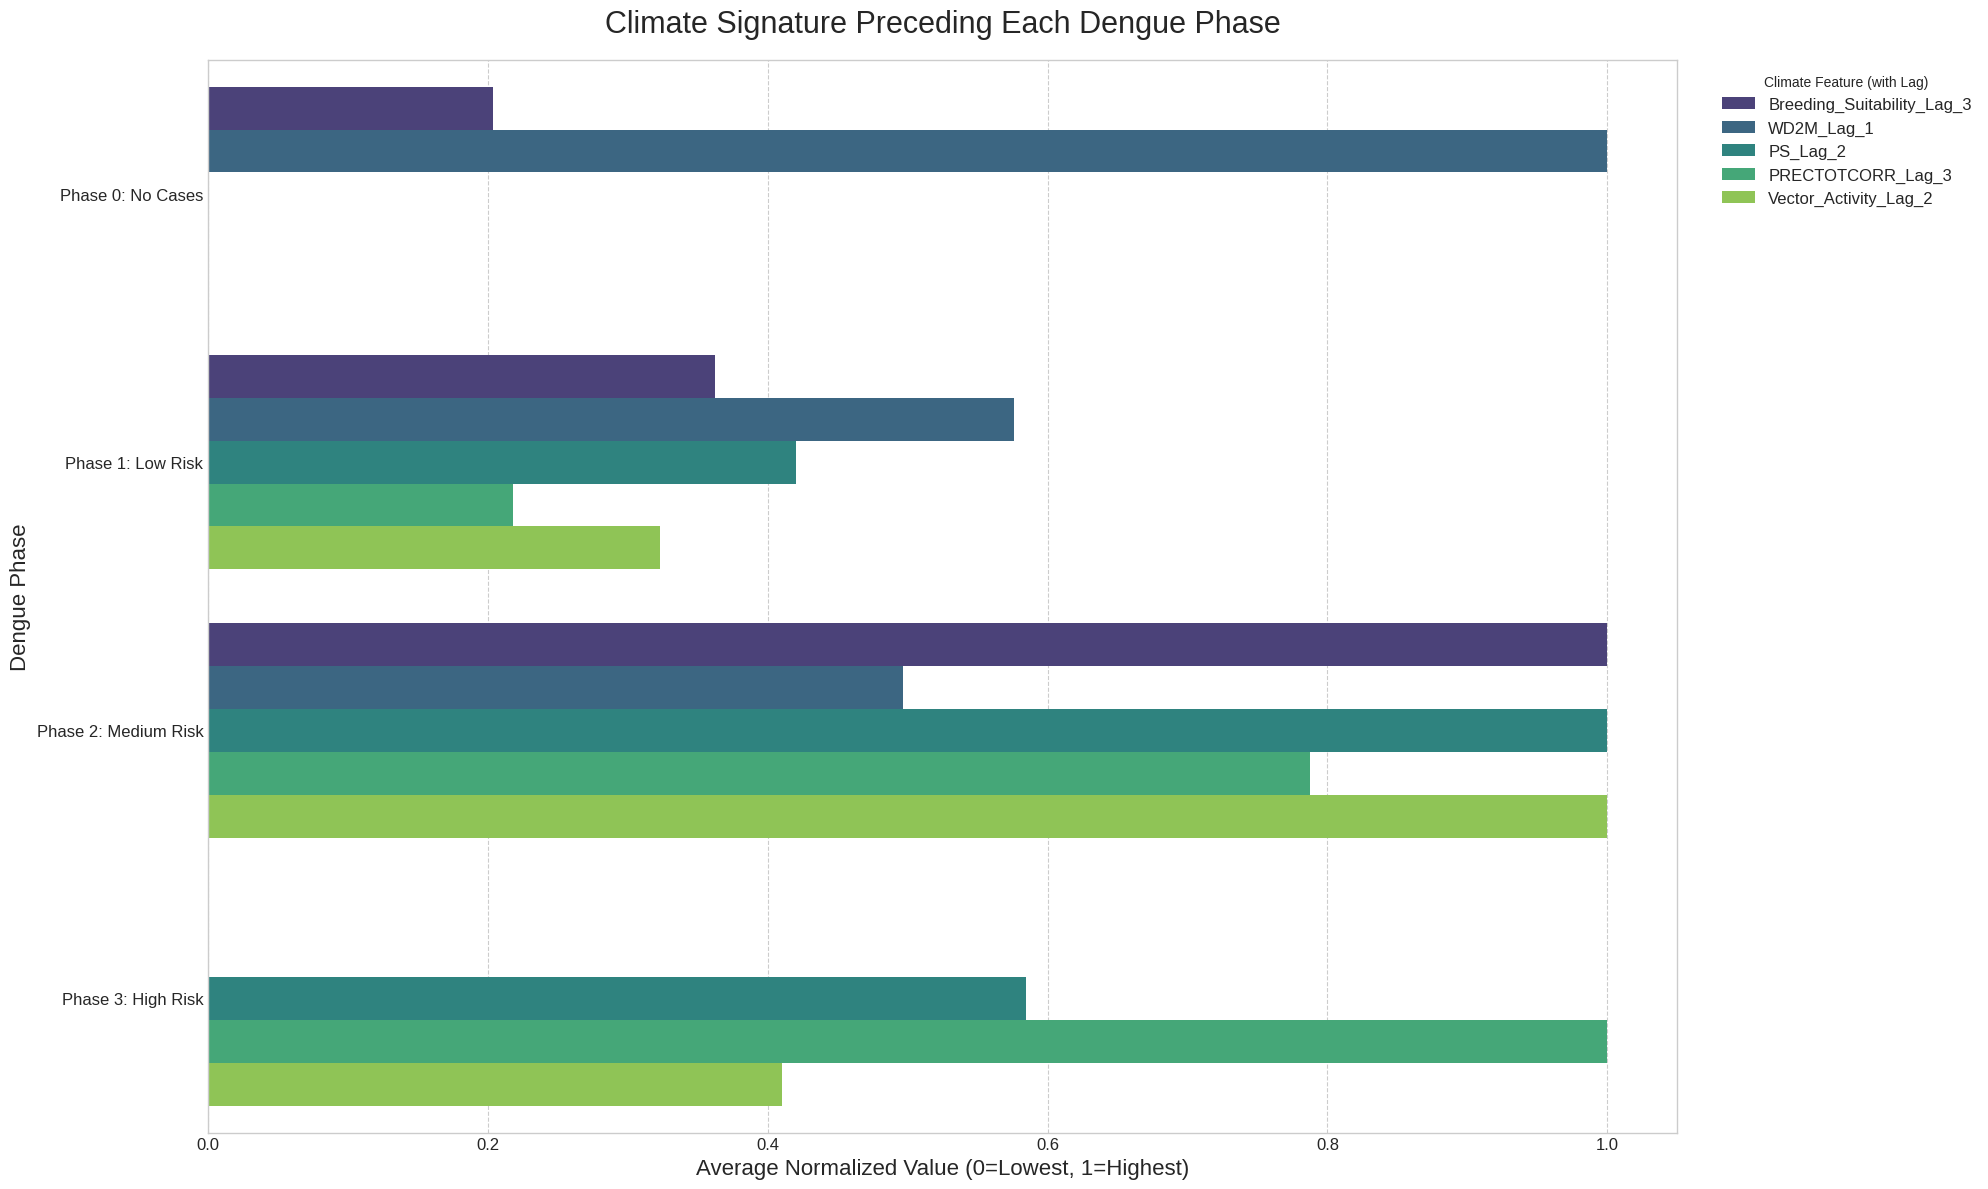


--- Analysis Complete ---
The chart above shows the 'climate signature' for each dengue phase.
It visualizes the average conditions of key climate variables in the months leading up to a specific phase.
For example, you can see how the climate profile for 'High Risk' differs from 'No Cases'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
# --- Imports for Analysis ---
from sklearn.preprocessing import MinMaxScaler

# ==============================================================================
# SETUP: PLOT STYLE
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# ==============================================================================
# STEP 1: LOADING, TRANSFORMING DATA AND CREATING INDICES
# (This part is maintained as it worked correctly)
# ==============================================================================
print("--- Step 1: Loading, Transforming Data and Creating Indices ---")

file_name = 'datos_dengue_clima_unificados.csv'

if not os.path.exists(file_name):
    print(f"Error: File '{file_name}' not found. Please upload it first.")
else:
    # Load and transform data
    df = pd.read_csv(file_name, low_memory=False)
    df.replace(-999, np.nan, inplace=True)
    df['Municipio'] = df['Municipio'].astype('category')

    spanish_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    dengue_cols = ['Año', 'Municipio'] + spanish_months
    # Create the new column 'Dengue_Cases' in English
    df_dengue_long = df[dengue_cols].drop_duplicates().melt(id_vars=['Año', 'Municipio'], var_name='Mes', value_name='Dengue_Cases')

    param_cols = [col for col in df.columns if 'parameter' in col]
    df_clima_full_long = pd.DataFrame()

    for p_col in param_cols:
        suffix = f"_{p_col.split('_')[-1]}"
        short_eng_months = [f"{m.lower()[:3]}{suffix}" for m in spanish_months]
        id_vars = ['Año', 'Municipio', p_col]
        value_vars = [m for m in short_eng_months if m in df.columns]
        if not value_vars: continue
        df_param_subset = df[id_vars + value_vars].dropna(subset=[p_col]).drop_duplicates()
        df_param_long = df_param_subset.melt(id_vars=id_vars, value_vars=value_vars, var_name='Mes_Code', value_name='Value')
        df_param_long.rename(columns={p_col: 'Parameter'}, inplace=True)
        mes_map = {old: new for old, new in zip(short_eng_months, spanish_months)}
        df_param_long['Mes'] = df_param_long['Mes_Code'].map(mes_map)
        df_clima_full_long = pd.concat([df_clima_full_long, df_param_long[['Año', 'Municipio', 'Mes', 'Parameter', 'Value']]])

    df_clima_wide = df_clima_full_long.pivot_table(index=['Año', 'Municipio', 'Mes'], columns='Parameter', values='Value', observed=False).reset_index()
    df_final = pd.merge(df_dengue_long, df_clima_wide, on=['Año', 'Municipio', 'Mes'], how='left')
    df_final.dropna(subset=['Dengue_Cases'], inplace=True)
    df_final.rename(columns={'Año': 'Year'}, inplace=True) # Standardize to English

    required_cols = ['T2M', 'T2M_MAX', 'T2M_MIN', 'T2MDEW', 'T2M_RANGE']
    indices = []
    if all(col in df_final.columns for col in required_cols):
        df_final['Breeding_Suitability'] = ((df_final['T2M_MIN'] - 15).clip(lower=0)) * df_final['T2MDEW']
        df_final['Heat_Stress'] = (df_final['T2M_MAX'] - 35).clip(lower=0)
        df_final['Vector_Activity'] = 1 / (1 + df_final['T2M_RANGE'])
        df_final['Incubation_Potential'] = 1 / (1 + abs(df_final['T2M'] - 27.5))
        indices = ['Breeding_Suitability', 'Heat_Stress', 'Vector_Activity', 'Incubation_Potential']

    print("Data processed and indices created.")

    # ==============================================================================
    # STEP 2: CREATING LAGGED FEATURES
    # ==============================================================================
    print("\n--- Step 2: Creating Lagged Features for all Climate Variables ---")

    climate_vars = df_clima_wide.columns.drop(['Año', 'Municipio', 'Mes']).tolist() + indices

    month_map = {month: i+1 for i, month in enumerate(spanish_months)}
    df_final['Month_Num'] = df_final['Mes'].map(month_map)
    df_final.sort_values(by=['Municipio', 'Year', 'Month_Num'], inplace=True)

    lag_cols = []
    for lag in [1, 2, 3]:
        for col in climate_vars:
            if col in df_final.columns:
                lag_col_name = f"{col}_Lag_{lag}"
                df_final[lag_col_name] = df_final.groupby('Municipio', observed=False)[col].shift(lag)
                lag_cols.append(lag_col_name)

    print("Lagged features created for all variables.")

    # ==============================================================================
    # STEP 3: DEFINING DENGUE EPIDEMIC PHASES
    # ==============================================================================
    print("\n--- Step 3: Defining Dengue Epidemic Phases ---")

    def assign_epidemic_phase(cases):
        if cases == 0:
            return 'Phase 0: No Cases'
        elif 1 <= cases <= 5:
            return 'Phase 1: Low Risk'
        elif 6 <= cases <= 20:
            return 'Phase 2: Medium Risk'
        else:
            return 'Phase 3: High Risk'

    df_final['Phase'] = df_final['Dengue_Cases'].apply(assign_epidemic_phase)

    print("Dengue phases assigned. Distribution:")
    print(df_final['Phase'].value_counts())

    # ==============================================================================
    # STEP 4: ANALYZING CLIMATE PROFILE PER PHASE
    # ==============================================================================
    print("\n--- Step 4: Analyzing Climate Profile per Dengue Phase ---")

    df_analysis = df_final.dropna(subset=lag_cols).copy()

    # Select the most important variables found in the previous analysis
    # to keep the analysis focused and relevant.
    potential_top_features = [
        'Breeding_Suitability_Lag_3',
        'WD2M_Lag_1',
        'WS10M_Min_Lag_3',
        'PS_Lag_2',
        'PRECTOTCORR_Lag_3',
        'Vector_Activity_Lag_2'
    ]

    # --- ERROR CORRECTION ---
    # Filter the list to only include columns that actually exist in the DataFrame.
    # This avoids a KeyError if a variable was not in the original data file.
    top_features = [feature for feature in potential_top_features if feature in df_analysis.columns]

    print(f"\nUsing the following features for analysis: {top_features}")

    # Calculate the average of each climate variable for each phase
    phase_profile = df_analysis.groupby('Phase')[top_features].mean().reset_index()

    print("\nAverage Climate Profile Leading to Each Dengue Phase:")
    print(phase_profile)

    # ==============================================================================
    # STEP 5: VISUALIZING THE CLIMATE PROFILE
    # ==============================================================================
    print("\n--- Step 5: Visualizing Climate Profiles ---")

    # Normalize the data to be able to compare them on the same scale
    scaler = MinMaxScaler()
    profile_scaled = phase_profile.copy()
    profile_scaled[top_features] = scaler.fit_transform(profile_scaled[top_features])

    # Transform the dataframe to a long format for easier plotting
    profile_melted = profile_scaled.melt(id_vars='Phase', var_name='Climate_Feature', value_name='Normalized_Value')

    # Create the plot
    plt.figure(figsize=(20, 12))
    sns.barplot(
        data=profile_melted,
        x='Normalized_Value',
        y='Phase',
        hue='Climate_Feature',
        orient='h',
        palette='viridis'
    )

    plt.title('Climate Signature Preceding Each Dengue Phase', fontsize=22, pad=20)
    plt.xlabel('Average Normalized Value (0=Lowest, 1=Highest)', fontsize=16)
    plt.ylabel('Dengue Phase', fontsize=16)
    plt.legend(title='Climate Feature (with Lag)', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, which='major', axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    print("\n--- Analysis Complete ---")
    print("The chart above shows the 'climate signature' for each dengue phase.")
    print("It visualizes the average conditions of key climate variables in the months leading up to a specific phase.")
    print("For example, you can see how the climate profile for 'High Risk' differs from 'No Cases'.")

--- Step 1: Loading and Transforming Data ---
Dengue data processed.

--- Step 2: Defining Dengue Risk Phases ---
Risk phases assigned.

--- Step 3: Analyzing Seasonal Risk Frequency with a Lag ---

Seasonal Risk Profile (Probability that a month's climate leads to each phase 3 months later):
Future_Phase_Lag_3  Phase 0: No Cases  Phase 1: Low Risk  \
Mes                                                        
Enero                        0.846933           0.116800   
Febrero                      0.816533           0.133333   
Marzo                        0.778133           0.140800   
Abril                        0.739733           0.152533   
Mayo                         0.686400           0.177600   
Junio                        0.626133           0.191467   
Julio                        0.574400           0.192533   
Agosto                       0.540800           0.197333   
Septiembre                   0.514133           0.184533   
Octubre                      0.870286         

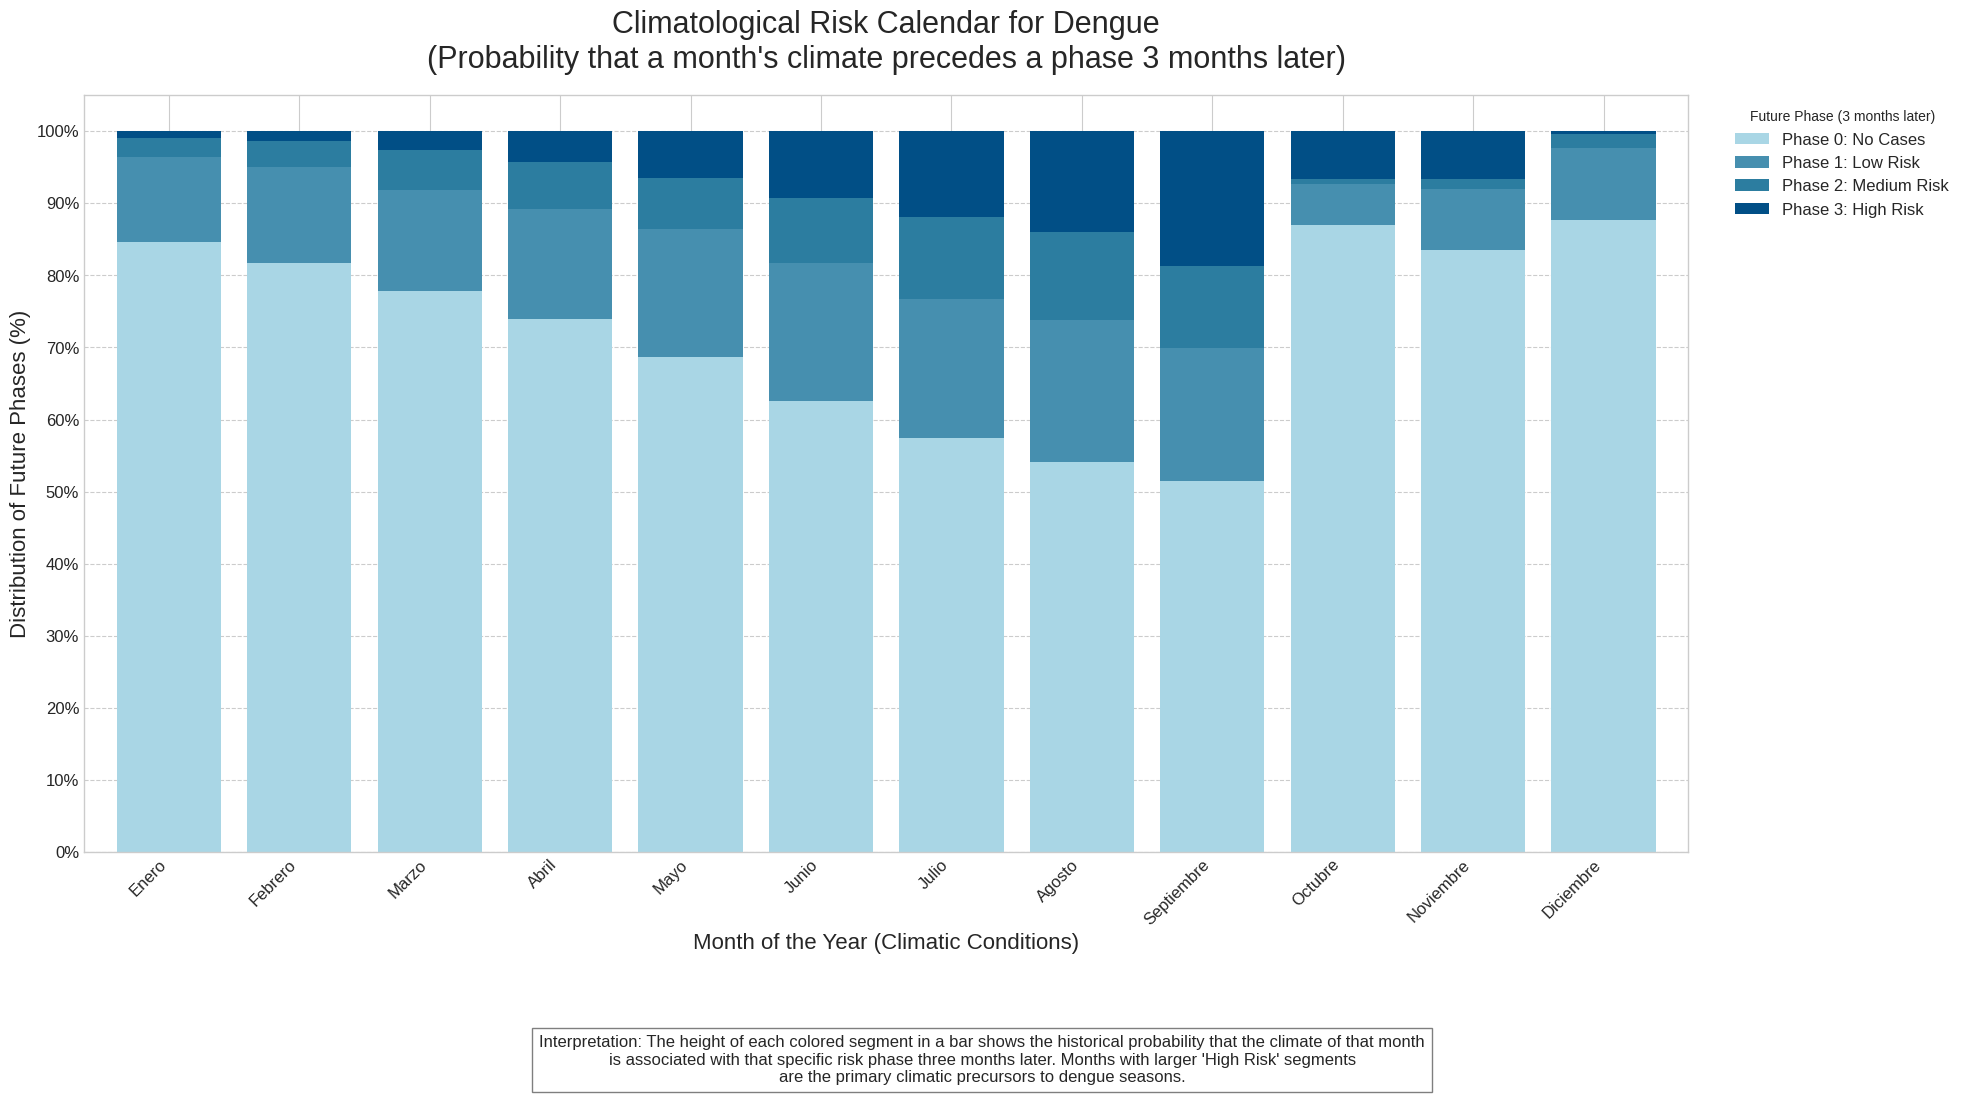


--- Analysis Complete ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

# ==============================================================================
# SETUP: PLOT STYLE
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# ==============================================================================
# STEP 1: DATA LOADING AND TRANSFORMATION
# (This part is robust and maintained)
# ==============================================================================
print("--- Step 1: Loading and Transforming Data ---")

file_name = 'datos_dengue_clima_unificados.csv'

if not os.path.exists(file_name):
    print(f"Error: File '{file_name}' not found. Please upload it first.")
else:
    # Load and transform data
    df = pd.read_csv(file_name, low_memory=False)
    df.replace(-999, np.nan, inplace=True)
    df['Municipio'] = df['Municipio'].astype('category')

    spanish_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    dengue_cols = ['Año', 'Municipio'] + spanish_months
    df_dengue_long = df[dengue_cols].drop_duplicates().melt(id_vars=['Año', 'Municipio'], var_name='Mes', value_name='Dengue_Cases')

    # Clean up memory
    del df
    gc.collect()

    print("Dengue data processed.")

    # ==============================================================================
    # STEP 2: DEFINING EPIDEMIC PHASES
    # ==============================================================================
    print("\n--- Step 2: Defining Dengue Risk Phases ---")

    def assign_risk_category(cases):
        if cases == 0:
            return 'Phase 0: No Cases'
        elif 1 <= cases <= 5:
            return 'Phase 1: Low Risk'
        elif 6 <= cases <= 20:
            return 'Phase 2: Medium Risk'
        else:
            return 'Phase 3: High Risk'

    df_dengue_long['Phase'] = df_dengue_long['Dengue_Cases'].apply(assign_risk_category)

    month_map = {month: i+1 for i, month in enumerate(spanish_months)}
    df_dengue_long['Month_Num'] = df_dengue_long['Mes'].map(month_map)
    df_dengue_long.sort_values(by=['Municipio', 'Año', 'Month_Num'], inplace=True)

    print("Risk phases assigned.")

    # ==============================================================================
    # STEP 3: SEASONAL RISK FREQUENCY ANALYSIS
    # ==============================================================================
    print("\n--- Step 3: Analyzing Seasonal Risk Frequency with a Lag ---")

    # We create a column that tells us what the phase will be in the future
    # A lag of -3 means we are looking 3 months into the future
    df_dengue_long['Future_Phase_Lag_3'] = df_dengue_long.groupby('Municipio', observed=False)['Phase'].shift(-3)

    # We remove the rows where we cannot know the future phase (the end of the dataset)
    df_analysis = df_dengue_long.dropna(subset=['Future_Phase_Lag_3']).copy()

    # We group by month and calculate the distribution of future phases
    # This tells us: "What phases does the climate of January usually precede 3 months later?"
    seasonal_risk_profile = df_analysis.groupby('Mes')['Future_Phase_Lag_3'].value_counts(normalize=True).unstack().fillna(0)

    # Order the months chronologically
    seasonal_risk_profile = seasonal_risk_profile.reindex(spanish_months)

    print("\nSeasonal Risk Profile (Probability that a month's climate leads to each phase 3 months later):")
    print(seasonal_risk_profile)

    # ==============================================================================
    # STEP 4: VISUALIZING THE RISK CALENDAR
    # ==============================================================================
    print("\n--- Step 4: Visualizing the Climatological Risk Calendar ---")

    # Colors for each phase
    colors = {
        'Phase 0: No Cases': '#a9d6e5',
        'Phase 1: Low Risk': '#468faf',
        'Phase 2: Medium Risk': '#2c7da0',
        'Phase 3: High Risk': '#014f86'
    }

    # Ensure all phases are present, even with a zero value
    for phase in colors.keys():
        if phase not in seasonal_risk_profile.columns:
            seasonal_risk_profile[phase] = 0

    # Create the stacked bar chart
    ax = seasonal_risk_profile[colors.keys()].plot(
        kind='bar',
        stacked=True,
        figsize=(20, 10),
        color=[colors[phase] for phase in seasonal_risk_profile[colors.keys()].columns],
        width=0.8
    )

    plt.title('Climatological Risk Calendar for Dengue\n(Probability that a month\'s climate precedes a phase 3 months later)', fontsize=22, pad=20)
    plt.xlabel('Month of the Year (Climatic Conditions)', fontsize=16)
    plt.ylabel('Distribution of Future Phases (%)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(np.arange(0, 1.1, 0.1), [f'{int(y*100)}%' for y in np.arange(0, 1.1, 0.1)])
    plt.legend(title='Future Phase (3 months later)', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, which='major', axis='y', linestyle='--')
    plt.tight_layout(pad=2)

    # Add explanatory text
    plt.figtext(0.5, -0.1,
          "Interpretation: The height of each colored segment in a bar shows the historical probability that the climate of that month\n"
          "is associated with that specific risk phase three months later. Months with larger 'High Risk' segments\n"
          "are the primary climatic precursors to dengue seasons.",
          ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

    plt.show()

    print("\n--- Analysis Complete ---")

In-Depth Analysis of the Biological and Molecular Mechanisms Driving Dengue Transmission Dynamics
The predictive power of the spatiotemporal model presented in this analysis is fundamentally derived from its capacity to serve as a high-level abstraction of the intricate, multi-scale biological systems that govern dengue virus (DENV) transmission. The machine learning algorithm effectively deciphers complex patterns in macro-environmental data that correlate with, and are proxies for, the underlying micro-environmental and molecular processes. This document provides a detailed exposition of these core biological mechanisms.

1. Vector Bionomics and Environmental Forcing
The climate variables identified as significant predictors are directly tied to the population dynamics and behavior of the primary vector, Aedes aegypti. The model's incorporation of temporal lags is critical, as these delays correspond to the duration of key physiological and ecological processes.

1.1 Thermal and Hydrological Dependencies of the Life Cycle
The vector's life cycle is inextricably linked to temperature and water availability. The model captures this through variables like precipitation (PRECTOTCORR) and temperature-based indices (Breeding_Suitability).

Oviposition and Embryonic Development: Precipitation events, captured by PRECTOTCORR_Lag_3, directly increase the number and quality of aquatic habitats required for egg-laying (oviposition). A 3-month lag is ecologically significant as it allows for the accumulation of sufficient water in containers to support multiple generations, leading to an exponential increase in vector population density. Aedes eggs also possess desiccation resistance, and their hatching is often stimulated by subsequent rainfall events, a complex dynamic that is implicitly captured by analyzing precipitation patterns over a longer preceding period.

Larval and Pupal Development: The metabolic rates of the aquatic larval and pupal stages are governed by ambient temperature. Warmer water accelerates development, shortening the time from egg to adult. However, temperatures exceeding a critical thermal maximum can increase mortality. The Breeding_Suitability index serves as a proxy for this non-linear thermal performance curve, identifying conditions that maximize adult emergence rates.

1.2 Bioenergetics of Host-Seeking and Dispersal
Vectorial capacity is not merely a function of vector density but also of its behavior and interaction with the host population.

Flight and Host Location: The variable WS10M_Min_Lag_3 (minimum wind speed) is a crucial proxy for host-seeking success. Aedes aegypti flight is metabolically costly and mechanically inhibited by high winds. Periods of low wind velocity are more conducive to tracking host-emitted CO₂ and olfactory plumes. Therefore, a sustained period of calm weather increases the probability of successful blood-feeding, a prerequisite for both vector sustenance and virus transmission.

Biting Rate and the Gonotrophic Cycle: The frequency of biting is determined by the duration of the gonotrophic cycle (the physiological process of converting a blood meal into a batch of eggs). This cycle is accelerated by warmer temperatures, leading to a higher lifetime number of bites per female mosquito. The Vector_Activity index is a functional proxy for the thermal conditions that optimize this biting frequency, thereby increasing the number of opportunities for transmission events.

2. Viral Kinetics and the Determinants of Vectorial Capacity
The model's most sophisticated biological linkage is its ability to proxy the molecular processes of viral replication within the vector, a critical component of transmission.

2.1 The Extrinsic Incubation Period (EIP) as a Rate-Limiting Step
The EIP is the time-bound, rate-limiting step for a mosquito to become infectious. Following the ingestion of a viremic blood meal, the DENV must:

Infect and replicate within the vector's midgut epithelial cells.

Escape the midgut barrier and disseminate via the hemolymph.

Successfully infect the salivary glands to be present in the saliva for subsequent transmission.

This complex journey is a race against the mosquito's own mortality; if the EIP is longer than the mosquito's lifespan, no transmission can occur.

2.2 Temperature-Modulated Viral Replication Kinetics
The duration of the EIP is almost entirely dictated by temperature. The replication of the DENV genome is catalyzed by its RNA-dependent RNA polymerase (RdRp), an enzyme with a specific thermal performance curve.

The Incubation_Potential Index: This index is a brilliant mathematical proxy for the enzymatic efficiency of the viral RdRp. The formula, which defines an optimum around 27.5°C, effectively models the principle that viral replication accelerates as temperatures approach this optimum, thus shortening the EIP. Conversely, temperatures significantly below or above this range will slow enzymatic activity or denature the polymerase, lengthening the EIP and reducing transmission probability. The model's finding that this index is highly significant with a 1-2 month lag directly corresponds to the time required for a newly emerged cohort of mosquitoes to acquire the virus and complete this temperature-sensitive incubation.

2.3 An Integrated View: The Vectorial Capacity Equation
Ultimately, the Random Forest model is empirically solving a data-driven version of the classic Vectorial Capacity (VC) equation, which synthesizes these biological factors. The key variables identified by the model map directly to the components of VC:

Vector Density (m): Proxied by PRECTOTCORR and Breeding_Suitability.

Biting Rate (a): Proxied by Vector_Activity.

Vector Survival (p): Implicitly related to optimal temperature ranges.

Extrinsic Incubation Period (n): Proxied by Incubation_Potential.

The model's success demonstrates that by integrating these lagged environmental variables, it can effectively estimate the conditions that maximize vectorial capacity, leading to a high probability of epidemic transmission. This provides a robust, biologically grounded framework for forecasting dengue risk and deploying proactive public health interventions.